In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("sensors/gnss/vehicle-id-389.csv")
df_1.head()

,id,frame,timestamp,lat,long,alt,speed
0,389,373857,12.636810,-0.000150,-0.000181,2.997955,0.000000
1,389,374045,15.642386,-0.000150,-0.000207,2.996503,5.674846
2,389,374262,18.647036,-0.000149,-0.000366,2.997801,8.103674
3,389,374498,21.639094,-0.000148,-0.000584,2.998111,7.437208
4,389,374763,24.635443,-0.000148,-0.000739,2.999860,1.242048


In [3]:
df_1.describe()

,id,frame,timestamp,lat,long,alt,speed
count,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,389.0,402267.344262,377.141203,-0.000364,0.000105,2.997681,5.830597
std,0.0,16203.883184,211.743037,0.000648,0.000808,0.000312,3.365820
min,389.0,373857.000000,12.636810,-0.001268,-0.001029,2.996167,0.000000
25%,389.0,388547.500000,194.891831,-0.000988,-0.000740,2.997642,4.270100
50%,389.0,402231.500000,377.137527,-0.000441,0.000185,2.997704,8.127105
75%,389.0,416257.500000,559.394163,0.000174,0.000984,2.997722,8.139575
max,389.0,430255.000000,741.641097,0.000617,0.000988,2.999860,8.449184


## print car velocity at each point of the map

<AxesSubplot:xlabel='long', ylabel='lat'>

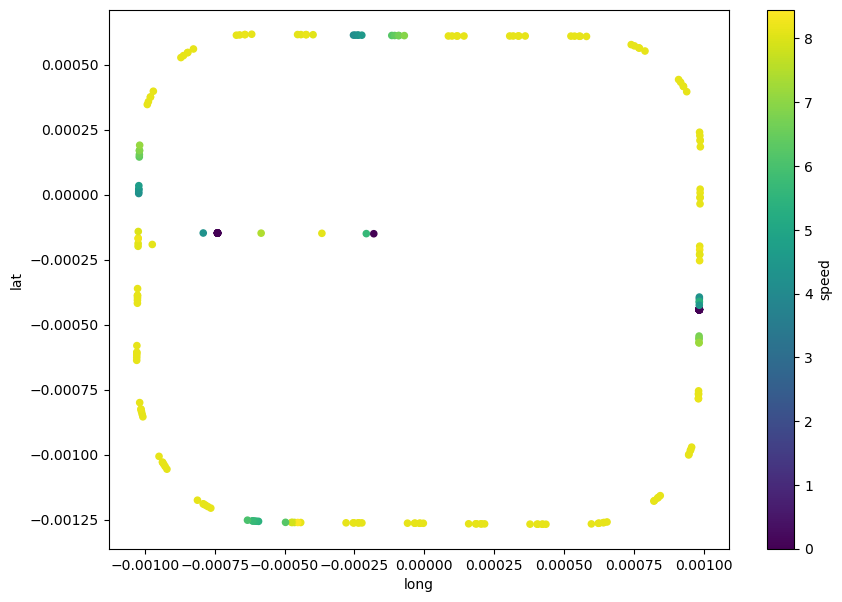

In [4]:
df_1.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [5]:
df_2 = pd.read_csv("sensors/gnss/vehicle-id-390.csv")
df_2.head()

,id,frame,timestamp,lat,long,alt,speed
0,390,373860,12.683559,-0.000596,0.000772,2.994466,0.000000
1,390,374047,15.674622,-0.000596,0.000744,2.996406,6.006593
2,390,374264,18.671953,-0.000596,0.000592,2.997957,4.180732
3,390,374501,21.674036,-0.000596,0.000525,2.997551,0.000255
4,390,374766,24.668036,-0.000593,0.000491,2.996194,4.243181


In [6]:
df_2.describe()

,id,frame,timestamp,lat,long,alt,speed
count,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,390.0,402269.901639,377.174378,-0.000262,-0.000011,2.997691,4.776876
std,0.0,16203.830298,211.742727,0.000485,0.000656,0.000489,3.574196
min,390.0,373860.000000,12.683559,-0.001237,-0.000997,2.994466,0.000000
25%,390.0,388550.500000,194.926310,-0.000593,-0.000539,2.997645,0.000086
50%,390.0,402234.500000,377.180476,-0.000211,-0.000205,2.997689,6.094822
75%,390.0,416260.250000,559.426044,0.000074,0.000659,2.997761,8.138848
max,390.0,430258.000000,741.676050,0.000553,0.000953,2.999992,8.507701


## print car velocity at each point of the map (CAR2)

<AxesSubplot:xlabel='long', ylabel='lat'>

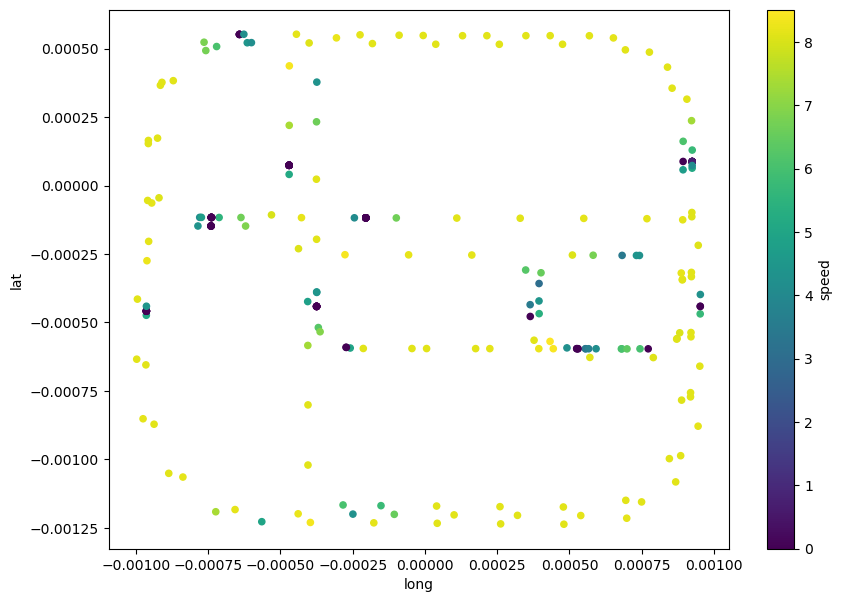

In [7]:
df_2.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

In [8]:
df = pd.concat([df_1, df_2])

In [9]:
df.head()

,id,frame,timestamp,lat,long,alt,speed
0,389,373857,12.636810,-0.000150,-0.000181,2.997955,0.000000
1,389,374045,15.642386,-0.000150,-0.000207,2.996503,5.674846
2,389,374262,18.647036,-0.000149,-0.000366,2.997801,8.103674
3,389,374498,21.639094,-0.000148,-0.000584,2.998111,7.437208
4,389,374763,24.635443,-0.000148,-0.000739,2.999860,1.242048


## print 2 cars trajectories, color by car

<AxesSubplot:xlabel='long', ylabel='lat'>

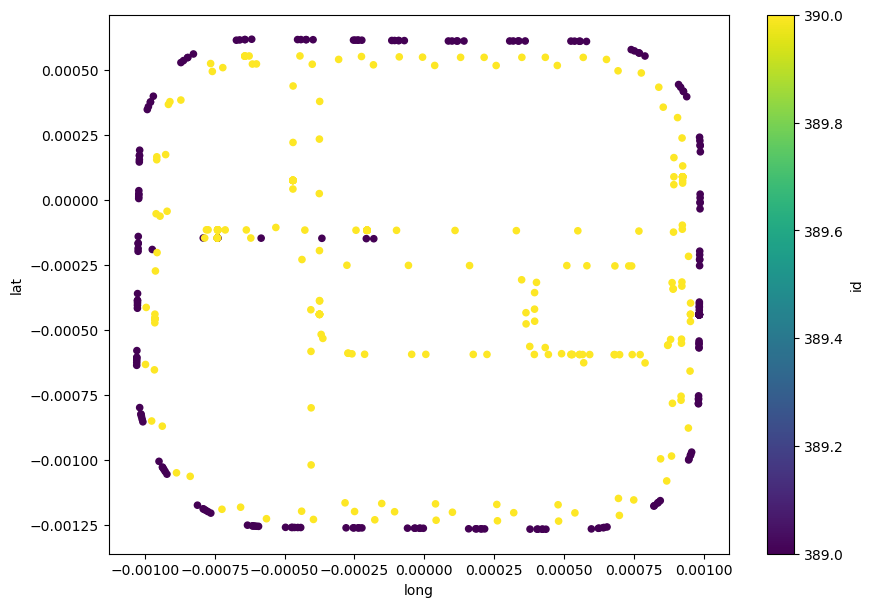

In [10]:
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## print 2 cars trajectories, color by timestamp

<AxesSubplot:xlabel='long', ylabel='lat'>

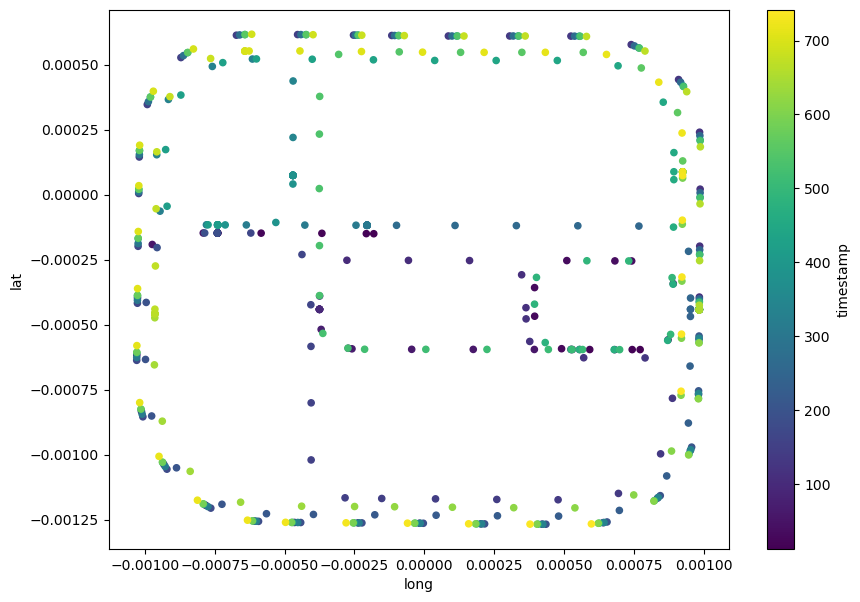

In [11]:
df.plot.scatter(x="long",y="lat", c='timestamp', colormap='viridis', figsize=(10,7))

## Add car 3

<AxesSubplot:xlabel='long', ylabel='lat'>

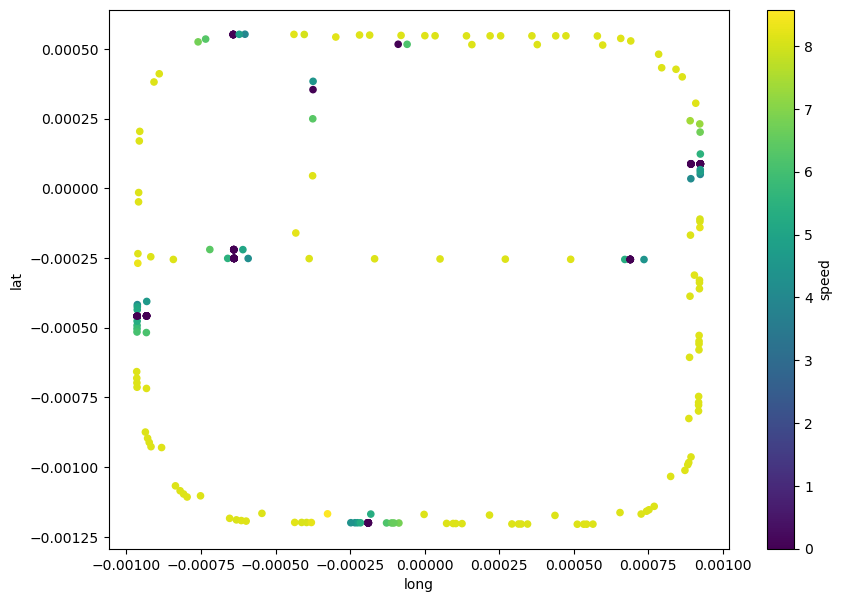

In [12]:
df_3 = pd.read_csv("sensors/gnss/vehicle-id-391.csv")
df_3.plot.scatter(x="long",y="lat", c='speed', colormap='viridis', figsize=(10,7))

## print trajectories of the 3 cars

<AxesSubplot:xlabel='long', ylabel='lat'>

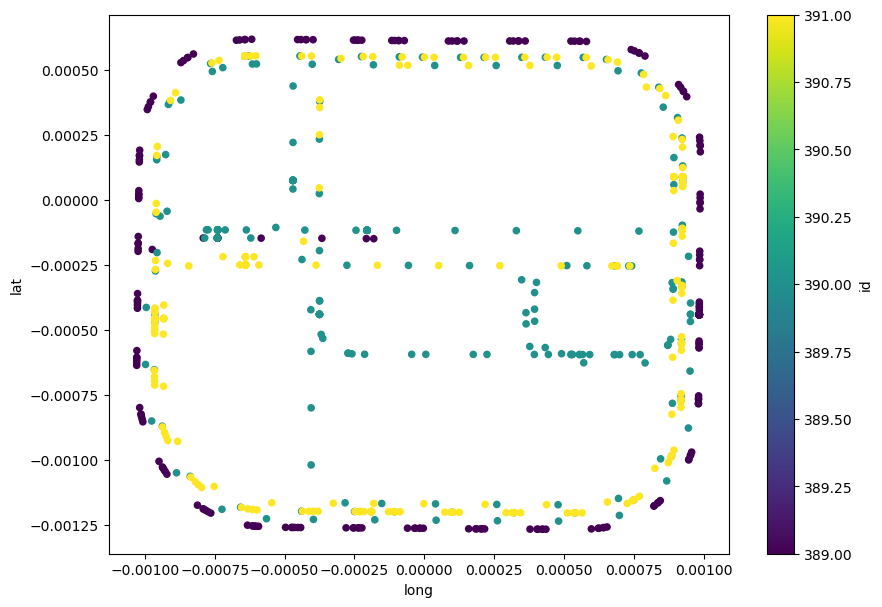

In [13]:
df = pd.concat([df, df_3])
df.plot.scatter(x="long",y="lat", c='id', colormap='viridis', figsize=(10,7))

## Plot trajectories on top of the map
### color = speed

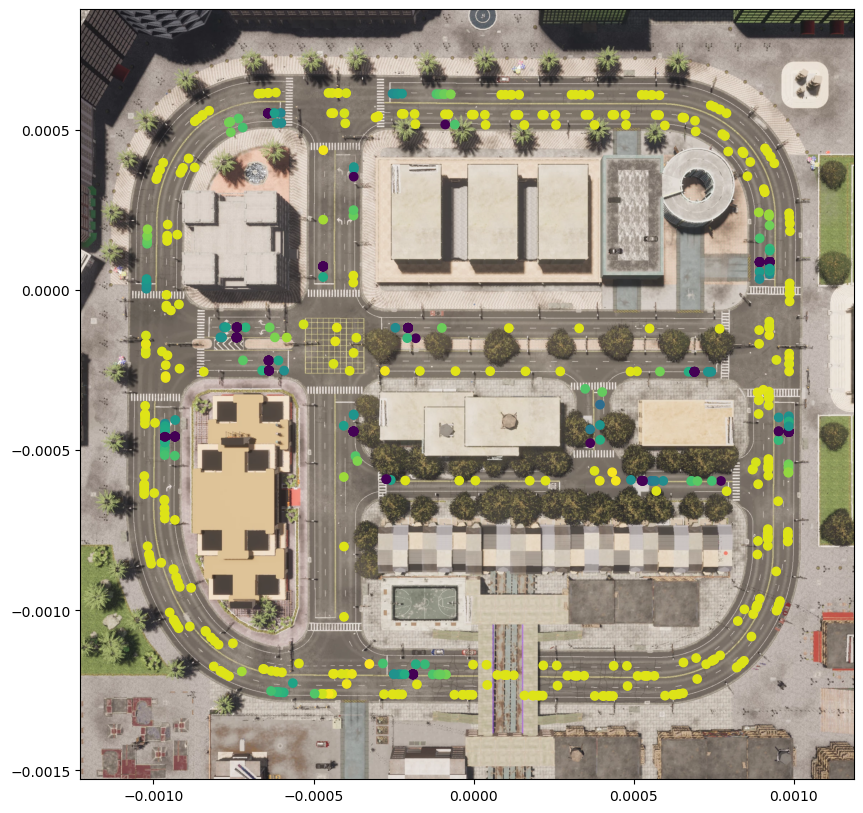

In [120]:
import matplotlib.cm as cm
import numpy as np

tailored_extent = [df.long.min()-0.0002,
                   df.long.max() + 0.0002,
                   df.lat.min()-0.00026,
                   df.lat.max() + 0.00026]

#colors = cm.rainbow(np.linspace(0, 1, 10))
# colors = cm.viridis(np.linspace(0, 8.5, 732))

img = plt.imread("town10aerial.webp")
plt.figure(figsize=(10,10))
plt.scatter(df.long.values,df.lat.values,c=df.speed, zorder=1)
#plt.figsize(15,7)
plt.imshow(img, zorder=0, extent=tailored_extent);